### Geometry OOP Lab - Study in Code Structure & UML Practice

--- 

The purpose of this lab is to use object-oriented programming in Python to design programs with good structure. In this lab, we will plan how to structure classes using UML and then implement the planning in Python.

The classes must have:
```
area property
circumference property

operator overload == to check similarity
operator overload comparator operators <, >, <=> , >
override of __repr__()
override of __str__

x and y representing the center position of the object
a translation method that makes it possible to move x and y
a method that checks if a certain point is inside the object
error handling
a method that checks if the circle instance is a unit circle
a method that checks if the rectangle instance is a square
```


## Bedömning

Börja med att skapa en planering med diagrams.net och därefter implementerar du din planering i Python. Det är helt okej att använda annan programvara för att skapa UML eller att göra en med papper och penna.Gör manuella tester, likt ovan, men testa mer. Tips är att ha en .ipynb-fil vid sidan om som importerar dina klasser för att göra manuella tester medan du skriver klasserna.Om du har fått någon kodsnutt från någon annan eller hittat i någon sida är det viktigt att du källhänvisar. Skriv en kommentar bredvid koden som du har tagit.gjort en enkel planering med UML löst uppgift på korrekt sätt koden är kommenterad med relevanta kommentarer, docstrings ska användas variabelnamnen är bra valda gjort flera relevanta git commitskoden är enkel att följa koden är välstrukturerad med lämpliga klasser, funktioner, metoder koden återanvänds där det går istället för att återupprepa kommentarerna är datavetenskapligt korrekta gjort samtliga uppgifter

#TODO

override av __str__

felhantering

x och y som representerar **mittpositionen** av objektet

en metod som checkar om en viss punkt befinner sig innanför objektet

felhantering


In [825]:
# When plotting a circle or sphere, point is always center since the shape extends using radius from midpoint.
# However rectangles are _not_ the sames. We have to extend the rectangle from the midpoint of the diagonal.


from __future__ import annotations
from dataclasses import dataclass
import math
import matplotlib.pyplot as plt

@dataclass(repr=False)
class Shape:
    """
    Used to instantiate shapes (2D and 3D).
    
    Forces all shape to have positional values. Shouldn't be instantiated on its own.

    Attributes
    ----------
    position : tuple
        Values representing the center position of the object (x,y,z.. etc).
    
    Methods
    ----------
    translate_position(position: tuple)
        Call as normal class method to update positional data of given shape.
    """

    position: tuple

    @property # Read-only, getter
    def position(self) -> tuple:
        print("position getter running")
        return self._position

    @position.setter # Read and write, setter
    def position(self, value: tuple):
        """Sets position to given value."""

        print("position setter running")

        if not isinstance(value, (tuple)):
            raise TypeError(f"Position must be tuple not {type(value)}")

        #TODO Throw ValueError if points in position tuple =< object dimension value
        #i.e. a 3D object must cover at least 3 points in space, etc.

        self._position = value

    def translate_position(self, position: tuple) -> tuple:
        """
        Callable method to translate positional values (center point) of shape.

        Same as typing 'object.position' except translate_position() stores previous positional values in variable 'old_pos'.
        """

        print("translate_position running")

        # Stores previous position
        old_pos = self.position
                # TODO: add meaning to this variable (maybe animating path or something(?))

        # Updates position to new value
        self.position = position

        print(f"{old_pos=}, new={position}")

        return self.position

  # Operator overloading for size equality in AREA.
    def __eq__(self, other: Shape) -> bool:
        print("__eq__ called from Shape class")
        """Checks if any two given rectangles are identical in size."""

        if self.width == other.width and self.height == other.height:
            return True
        else: return False

    # Operator overloading for AREA comparison
    def __lt__(self, other: Shape) -> bool:
        print("__lt__ called from Shape class")
        if self.area < other.area: return True
        else: return False
        
    def __le__(self, other: Shape) -> bool:
        print("__le__ called from Shape class")
        if self.area <= other.area: return True
        else: return False

    def __gt__(self, other: Shape) -> bool:
        print("__gt__ called from Shape class")
        if self.area > other.area: return True
        else: return False
        
    def __ge__(self, other: Shape) -> bool:
        print("__ge__ called from Shape class")
        if self.area >= other.area: return True
        else: return False


    # str & repr
    def __str__(self) -> str:
        return str(self.__dict__)

    def __repr__(self) -> str:
        return str(self.__dict__)
        
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

class Rectangle(Shape):
    """
    Child class Rectangle. Inherits from Shape. Contains width, height, area and perimeter.

    Attributes
    ----------
    width: float
        Width (x) of rectangle.
    height: float
        Height (y) of rectangle.
    area: float
        Area (A) of rectangle.
    perimeter: float
        Perimeter (P) of rectangle.

    Methods
    -------
    is_square(width: float, height: float)
       Returns True if width == height.

    get_vertex(self)
        Calculates four corner points from square center.

    overloaded __eq__, __lt__, __le__, __gt__, __ge__

    """

    def __init__(self, position: tuple, width: float, height: float) -> None:
        
        super().__init__(position)
        self.width = width
        self.height = height

    @property 
    def area(self):
        return self.width * self.height

    @property
    def perimeter(self):
        return self.width * 2 + self.height *2

    def is_square(self, width: float, height: float) -> bool:
        """Checks if given rectangle is square."""

        if self.width == self.height: return True
        else: return False

    def get_vertex(self) -> tuple:
        """Returns P and Q from width, height and position."""

        P1 = ((self.position[1] + self.width /-2, self.position[0] + self.height /2))# top left
        P2 = ((self.position[1] + self.width /2, self.position[0]+ self.height /2)) # top right
        Q1 = ((self.position[1] + self.width /-2, self.position[0] + self.height /-2))# bottom left
        Q2 = ((self.position[1] + self.width /2, self.position[0] + self.height /-2)) # bottom right
        
        return [P1,P2,Q1,Q2]


    def __repr__(self):
        return f"{self.__class__.__name__} -- midpoint at {self.position} -- {self.area=}.)"

class Circle(Shape):
    """
    Child class Circle. Inhertis from Shape. Contains radius, area and circumference.

    Attributes
    ----------
    radius: float
        Radius (r) of circle.
    area: float
        Area (A) of circle.
    circumference: float
        Circumference (C) of circle.

    Methods
    -------
    n/a
    """

    def __init__(self, position: tuple, radius: float) -> None:
        
        super().__init__(position)
        self.radius = radius

    @property
    def area(self):
        return math.pi * self.radius ** 2
    
    @property
    def circumference(self):
        return math.pi * self.radius * 2

    def is_unit_circle(self) -> bool:
        if self.radius == 1 and self.position[0] == 0 and self.position[1] == 0:
            return True
        else:
            return False

 # Operator overloading for size equality in AREA.
    def __eq__(self, other: Shape) -> bool:
        """Checks if any two given rectangles are identical in size."""

        if self.area == other.area: return True
        else: return False

    def __repr__(self):
        return f"{self.__class__.__name__} -- midpoint at {self.position}, {self.radius=}, {self.area=}.)"

class Sphere(Circle):
    """
    Child class Sphere. Inhertis from Circle. Contains radius, volume and surface area.

    Attributes
    ----------
    radius: float
        Radius (r) of sphere.
    volume: float
        Volume (V) of sphere.
    surface_area: float
        Area (A) of sphere.

    Methods
    -------
    n/a
    """

    @property
    def volume(self):
        return (4/3) * math.pi * self.radius ** 3

    @property
    def surface_area(self):
        return 4 * math.pi * self.radius * 2
    
    # Operator overloading for VOLUME equality.
    def __eq__(self, other: Shape) -> bool:
        """Checks if any two given shapes are identical in volume."""
        print("__eq__ called from Sphere class")

        if self.volume == other.volume: return True
        else: return False

    # Operator overloading for VOLUME comparison.
    def __lt__(self, other: Shape) -> bool:
        print("__lt__ called from Sphere class")
        if self.volume < other.volume: return True
        else: return False
        
    def __le__(self, other: Shape) -> bool:
        print("__le__ called from Sphere class")
        if self.volume <= other.volume: return True
        else: return False

    def __gt__(self, other: Shape) -> bool:
        print("__gt__ called from Sphere class")
        if self.volume > other.volume: return True
        else: return False
        
    def __ge__(self, other: Shape) -> bool:
        print("__ge__ called from Sphere class")
        if self.volume >= other.volume: return True
        else: return False
     
class Cube(Rectangle):
    """
    Child class Cube. Inhertis from Rectangle. Contains width, height, length, surface area and and volume.

    Attributes
    -------
    width: float
        Width (x) of cube.
    height: float
        Height (y) of cube.
    length: float
        Length (z) of cube.
    volume: float
        Volume (V) of cube.
    surface_area: float
        Area (A) of cube.

    Methods
    -------
    n/a
    """

    def __init__(self, position: tuple, width: float, height: float, length: float) -> None:
        
        super().__init__(position, width, height)
        self.length = length

    @property
    def volume(self):
        return self.width * self.height * self.length

    @property
    def surface_area(self):
        return 6 * (self.width * self.height * self.length)

   # Operator overloading for VOLUME equality.
    def __eq__(self, other: Shape) -> bool:
        """Checks if any two given shapes are identical in volume."""
        print("__eq__ called from Cube class")

        if self.volume == other.volume:
            return True
        else: return False

    # Operator overloading for VOLUME comparison.
    def __lt__(self, other: Shape) -> bool:
        print("__lt__ called from Cube class")
        if self.volume < other.volume: return True
        else: return False
        
    def __le__(self, other: Shape) -> bool:
        print("__le__ called from Cube class")
        if self.volume <= other.volume: return True
        else: return False

    def __gt__(self, other: Shape) -> bool:
        print("__gt__ called from Cube class")
        if self.volume > other.volume: return True
        else: return False
        
    def __ge__(self, other: Shape) -> bool:
        print("__ge__ called from Cube class")
        if self.volume >= other.volume: return True
        else: return False

    def __repr__(self):
        return f"{self.__class__.__name__} -- midpoint at {self.position} -- {self.volume=}.)"



position setter running
position getter running
position getter running
position getter running
position getter running
position getter running
position getter running
position getter running
position getter running


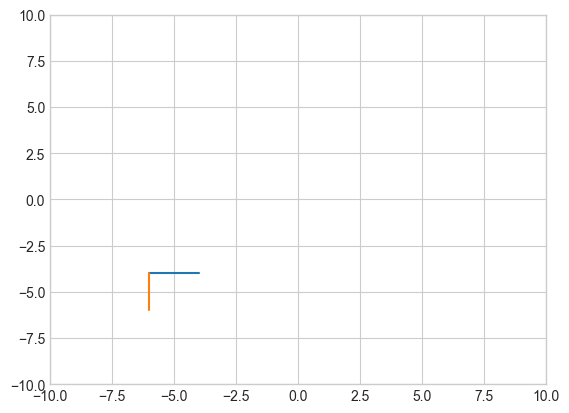

very good half rectangle...


In [857]:
import numpy as np

rectangle4 = Rectangle((-5,-5),2,2)

coordinates_test2 = rectangle4.get_vertex()
p1,p2,q1,q2 = coordinates_test2

def plot_lol():
    plt.xlim(-10, 10), plt.ylim(-10, 10)
    plt.plot(p1,p2,q1,q2)
    plt.show()


plot_lol()

print("very good half rectangle...")

The value is imported as tuples within tuple. This might be a very stupid thing to do. Or a good thing? Idk. It's late.

---

position setter running
position getter running
position getter running
position getter running
position getter running
position getter running
position getter running
position getter running
position getter running


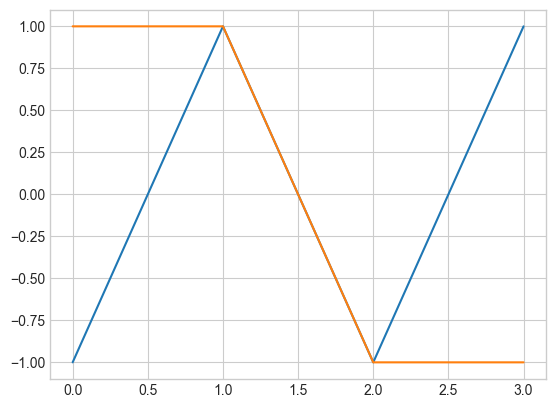

definitely not a cube


In [828]:
import numpy as np

rectangle4 = Rectangle((0,0),2.0,2.0)
coordinates_test2 = rectangle4.get_vertex() 

plt.plot(coordinates_test2)

plt.plot()
plt.show()

print("definitely not a cube")

In [829]:
rectangle1 = Rectangle((-100,-100),2,2)
rectangle2 = Rectangle((0,0),2,2)
print(rectangle1 > rectangle2)

print(rectangle2.height)
print(rectangle2.get_vertex())
print(rectangle1.get_vertex())

position setter running
position setter running
__gt__ called from Shape class
False
2
position getter running
position getter running
position getter running
position getter running
position getter running
position getter running
position getter running
position getter running
[(-1.0, 1.0), (1.0, 1.0), (-1.0, -1.0), (1.0, -1.0)]
position getter running
position getter running
position getter running
position getter running
position getter running
position getter running
position getter running
position getter running
[(-101.0, -99.0), (-99.0, -99.0), (-101.0, -101.0), (-99.0, -101.0)]


In [830]:
circleGG= Circle((0,0),12)

position setter running


In [831]:
import matplotlib.pyplot as plt

rectangle3 = Rectangle((-100,-100),2.0,2.0)

coordinates_test = rectangle3.get_vertex() 

# print(coordinates_test)
p1, p2 = coordinates_test[0]
q1, q2 = coordinates_test[1]

position setter running
position getter running
position getter running
position getter running
position getter running
position getter running
position getter running
position getter running
position getter running


In [832]:
cube1 = Cube((0,0,0),11,12,12)
cube2 = Cube((0,0,0),12,12,12)
print(cube1 > cube2)

print(cube1 == cube2)

cube1

position setter running
position setter running
__gt__ called from Cube class
False
__eq__ called from Cube class
False
position getter running


Cube -- midpoint at (0, 0, 0) -- self.volume=1584.)

In [833]:
circle1 = Circle((0,0),12)
circle2 = Circle((0,0),12)

print(circle1 == circle2)

print(circle1 > circle2)

circle2

position setter running
position setter running
True
__gt__ called from Shape class
False
position getter running


Circle -- midpoint at (0, 0), self.radius=12, self.area=452.3893421169302.)

---

In [834]:
sphereA = Sphere((0,0,0),14)
sphereB = Sphere((0,0,0),12)
print(sphereA == sphereB)

cube1

sphereA.radius

position setter running
position setter running
__eq__ called from Sphere class
False


14

In [835]:
rectangle22 = Rectangle((2,8), 1,1)

print(rectangle22.position)

rectangle22.translate_position((30,12))

print(rectangle22.position)

rectangle22.position = (23,12)

print(rectangle22.position)

position setter running
position getter running
(2, 8)
translate_position running
position getter running
position setter running
old_pos=(2, 8), new=(30, 12)
position getter running
position getter running
(30, 12)
position setter running
position getter running
(23, 12)


In [836]:
circle1 = Circle((0,0),12.4)

circle2 = Circle((0,0),12.1)

print(circle1.circumference)

print(circle2.is_unit_circle)

position setter running
position setter running
77.91149780902687
position getter running
<bound method Circle.is_unit_circle of Circle -- midpoint at (0, 0), self.radius=12.1, self.area=459.9605804120816.)>


In [837]:
square1 = Rectangle((0,0),12,12)
square2 = Rectangle((0,0),12,11)

print(square1.perimeter >= square2.perimeter)

circle1 = Circle((0,0),12)
#square2 = Rectangle((0,0),2,2)

print(square2.area)
print(circle1.area)

position setter running
position setter running
True
position setter running
132
452.3893421169302


In [838]:
square1 <= circle1

__le__ called from Shape class


True

In [839]:
sphereA > circle1

__gt__ called from Sphere class


AttributeError: 'Circle' object has no attribute 'volume'